In [1]:
import numpy as np
import copy

In [2]:
def Sigmoid(x):
    res = 1 / (1 + np.exp(-x))
    return res

def d_Sigmoid(x):
    y = x * (1 - x)
    return y

def ReLU(x):
    x = np.maximum(0, x)
    return x
    
def d_ReLU(x):
    #print('d_ReLU: ', x)
    
    x[x<=0] = 0
    x[x>0] = 1
    #print('d_ReLU: ', x)
    return x


def Linear(x):
    return x

def d_Linear(x):
    #print('d_Linear: ', x)
    y = np.ones(shape=(x.shape), dtype = x.dtype)
    #print('d_Linear: ', y)
    return y

activations_dict = {
'Sigmoid': [Sigmoid, d_Sigmoid],
'ReLU': [ReLU, d_ReLU], 
'Linear': [Linear, d_Linear]
}


In [3]:
class layer:
    def __init__(s, lr = 0.1, prev_size = 2, my_size=2, activation_type = "Sigmoid"):
        s.lr = lr
        s.size = my_size
        s.prev_size = prev_size
        s.weights = np.random.random((prev_size, s.size))
        s.bias = np.random.random((s.size))
        
        funcs = activations_dict.get(activation_type)
        s.activation_f = funcs[0]
        s.d_activation_f = funcs[1]


    def activate(s, x):
        return s.activation_f(x)
        
    def d_activate(s, x):
        return s.d_activation_f(x)  

    def forward(s, inputs):
        s.input = np.asarray(inputs)
        s.neurons = np.dot(s.input, s.weights)
        
        s.neurons+=s.bias
        
        s.neurons_activated = s.activate(s.neurons)
        #print("s.input ", s.input)
        #print('s.neurons_activated ',s.neurons_activated)
        return s.neurons_activated

    def forward_nu(s, inputs):
        
        input_data = np.asarray(inputs)

        neurons = np.dot(input_data, s.weights)
        neurons_activated = s.activate(neurons)
        
        return neurons_activated

    def backprop(s, layer_error):
        #print('s.neurons_activated ', s.neurons_activated)
        #print('layer_error ', layer_error)
        s.delta = layer_error * s.d_activate(s.neurons_activated)
        #print('s.delta ', s.delta)
        s.prev_layer_error = np.dot(s.delta, s.weights.T)
        #print('s.prev_layer_error ', s.prev_layer_error)
        return s.prev_layer_error
        
    def update_weights(s):
        #print('input in layer ', s.input.T)
        s.input_t = s.input.T
        s.x = s.input_t.reshape((s.input_t.shape[0], 1))
        s.d = s.delta.reshape((1, s.delta.shape[0]))
        s.weights += s.lr * np.dot(s.x, s.d)

        s.bias +=  s.lr * s.delta
        
    def print_info(s):
        print("my size: ", s.size)
        print("w: ", s.weights, "\n")
        print("b: ", s.bias, "\n")
        
    def print_pic(s):
        print_size = min(2, s.size)
        print("\n╻...\nv...")
        for i in range(print_size):
            #if (i == print_size/2 and print_size != s.size):
                #print ("--", s.size, "--\t", end='')
            print('O\t', end='')
        print ("--", format(s.size, ' 5d') , "--\t", end='')

    def add_neuron(s):     
        add_w = np.zeros(shape=(s.prev_size, 1), dtype=float) + 0.1
        s.weights = np.concatenate((s.weights, add_w.T))
        s.size+=1


class input_layer:
    def __init__(s, size):
        s.size = size
        s.values = np.zeros(shape=(size), dtype = float)

    def print_info(s):
        print("IN LAYER\nsize: ", s.size)
        print(s.values)

    def print_pic(s):
        print_size = min(2, s.size)

        for i in range(print_size):
            #if (i == print_size/2 and print_size != s.size):
                #print ("--", s.size, "--\t", end='')
                
            print("| |\t", end='')
        print("")
        for i in range(print_size):
            #if (i == print_size/2 and print_size != s.size):
                #print ("--", s.size, "--\t", end='')
            print(" v \t", end='')
        print("")
        for i in range(print_size):
            #if (i == print_size/2 and print_size != s.size):
                #print ("--", s.size, "--\t", end='')
            print(' @\t', end='')
        print ("--", format(s.size, ' 5d') , "--\t", end='')

    def forward(s, x):
        return x
        
    def forward_nu(s, x):
        return x
        
        


In [4]:

class plastic_nn:
    def __init__(s):
        s.layers = []
        s.n_of_layers = 0
        s.name = 'noname'
        pass

    def give_name(s, name):
        s.name = name
        
    def deep_copy(s):
        return copy.deepcopy(s)

    def forward(s, data):
        for lay in s.layers:
            data = lay.forward(data)
        s.last_result = data
        return s.last_result
        
    def forward_print(s, data):
        print('in: ',data)
        cnt = 0
        for lay in s.layers:
            data = lay.forward(data)
            print(cnt, ' ', data)
            cnt+=1
        s.last_result = data
        return s.last_result

    def forward_nu(s, data):
        for lay in s.layers:
            data = lay.forward_nu(data)
        last_result = data
        return last_result
        
    
    def backprop(s, correct):
        err = correct-s.last_result
        cnt = 0
        for lay in reversed(s.layers[1:]):
            #print(cnt)
            err = lay.backprop(err)
            cnt+=1

    def backprop_error(s, err):
        #err = correct-s.last_result

        for lay in reversed(s.layers[1:]):
            err = lay.backprop(err)

    def update_w(s):
        i = 0
        for lay in reversed(s.layers[1:]):
            #print('layer idx: ', i)
            i+=1
            lay.update_weights()
            #print('\n')

    def learn_one(s, in_data, target_data):
        pnn.forward(in_data)
        pnn.backprop(target_data)
        pnn.update_w()   
        
    def append_one(s, new_layer, check = False):
        if check and s.n_of_layers!=0:
            last_layer_size = s.layers[-1].size
            if last_layer_size != new_layer.prev_size:
                print("size not match, layer ", s.n_of_layers)
                return
        s.layers.append(new_layer)
        s.n_of_layers+=1
        pass

    def check_layers_sizes(s, check_layers):
        for i in range(1, len(check_layers)):
            if (check_layers[i-1].size != check_layers[i].prev_size):
                print("error between ", i-1, "and ", i)
                return False
        return True
        
    def append(s, new_layers):
        test_layers = np.array([])
        if s.n_of_layers != 0:
            test_layers = s.layers[-1]
            
        test_layers = np.append(test_layers, new_layers)
                
        if (s.check_layers_sizes(test_layers)):
            for lay in new_layers:
                s.append_one(lay)
            print("added LAYERS succesfully")
            return True
        else:
            print("ERROR adding layers, check info above")
            return False

    def print_info(s):
        print('NAME: ', s.name, ' (', s.n_of_layers, ')')
        for cnt in range(s.n_of_layers):
            print("#", cnt)
            s.layers[cnt].print_info()
            print("")
    
    def print_pic(s):
        print('NAME: ', s.name, ' (', s.n_of_layers, ')')
        cnt = 0
        for lay in s.layers:
            lay.print_pic()
            print("#", cnt, end='')
            cnt+=1
        print("\nOUT |#|\nOUT  v")




In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
import math
train_size = 500
data_x_offset = 20
data_y_offset = 20
in_data = [] 
target_data = []
for i in range(train_size):
    theta = np.random.random() * 2 * math.pi
    radius = np.random.rand() * 0.3
    if (i < train_size/4):
        in_data.append([0 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_data.append([-1])
    elif (i < 2*train_size/4):
        in_data.append([1 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_data.append([-1])
    elif(i < 3*train_size/4):
        in_data.append([ 1 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_data.append([1])
    else:
        in_data.append([ 0 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_data.append([1])

test_size = round(train_size*0.2)
in_test_data = [] 
target_test_data = []
for i in range(test_size):
    theta = np.random.random() * 2 * math.pi
    radius = np.random.rand() * 0.3
    if (i < test_size/4):
        in_test_data.append([0 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_test_data.append([-1])
    elif (i < 2*test_size/4):
        in_test_data.append([1 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_test_data.append([-1])
    elif(i < 3*test_size/4):
        in_test_data.append([ 1 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_test_data.append([1])
    else:
        in_test_data.append([ 0 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_test_data.append([1])

# plt.figure()
# plt.scatter(np.array(in_data)[:, 0], np.array(in_data)[:, 1], c = target_data+2)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title("training data")

# plt.figure()
# plt.scatter(np.array(in_test_data)[:, 0], np.array(in_test_data)[:, 1], c = target_test_data+2)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title("test data")

In [7]:

in_layer = input_layer(2)
tl = layer(lr = 0.001, prev_size = 2, my_size=32, activation_type="ReLU")
out_layer = layer(lr = 0.001, prev_size = 32, my_size=1, activation_type="Linear")

pnn = plastic_nn()
layers = [in_layer, tl, out_layer]

pnn.append(layers)

added LAYERS succesfully


True

Text(0, 0.5, 'error')

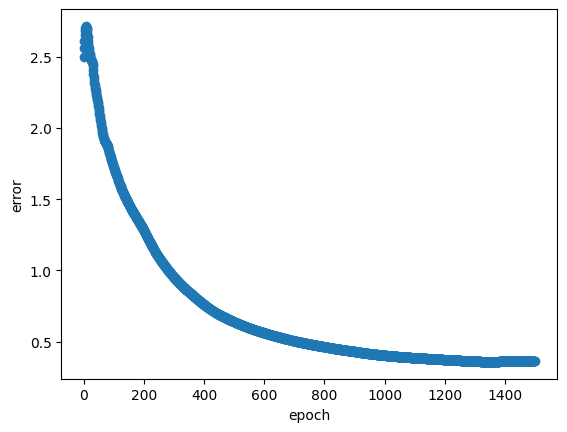

In [8]:
to_display_bar = True

graph_err = []
graph_epoch=[]
epochs = 1500
target_data = np.array(target_data)
#print(target_data)

bar_len = 50

def display_bar(bar_len, idx, total):
    idx = int(idx*bar_len/total)
    #print(perc)
    print("[", "-"*idx, "*", "-"*(bar_len-idx-1), "]", end='')
    print("\r",end='')

for i in range(epochs):
    if to_display_bar:
        display_bar(bar_len, i, epochs)
    
    for idx in range(len(in_data)):
        #print("idx ", idx)
        pnn.learn_one(in_data[idx], target_data[idx])



    error_sum = 0
    for idx in range(len(in_test_data)):
        valid_res = pnn.forward(in_test_data[idx])
        #print(target_test_data[idx])
        #print(valid_res)
        error = 0.5*((target_test_data[idx] - valid_res)**2)
        error_sum+=error
    
    graph_err.append(error_sum/len(in_test_data))
    graph_epoch.append(i)



#print("graph_epoch ", graph_epoch)
#print("(graph_err)", graph_err)
plt.figure()
plt.scatter(graph_epoch, graph_err)
plt.xlabel('epoch')
plt.ylabel('error')


    

In [12]:
graph_epoch = np.asarray(graph_epoch)
graph_err =np.asarray(graph_err)
# graph_epoch = graph_epoch.reshape(graph_epoch.shape[0], 1, 2)
print("graph_epoch ", graph_epoch.shape)
print("graph_err", graph_err.shape)


graph_epoch  (1500,)
graph_err (1500, 1)


Text(0, 0.5, 'error')

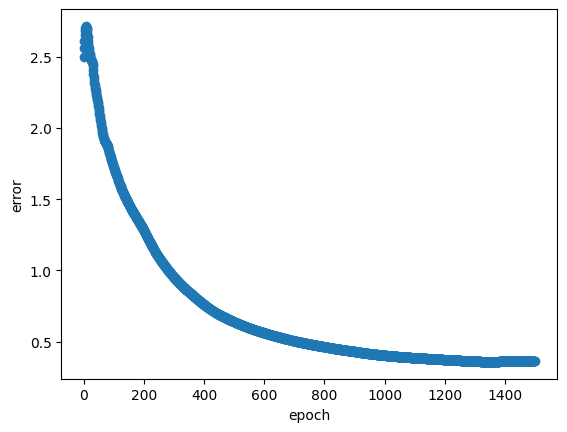

In [10]:
#print("graph_epoch ", graph_epoch)
#print("(graph_err)", graph_err)
plt.figure()
plt.scatter(graph_epoch, graph_err)
plt.xlabel('epoch')
plt.ylabel('error')

In [9]:
test_2_in = [[0, 0.1], [0,1], [1, 0], [1, 0.9]]
for i in range(4):
    print(pnn.forward(test_2_in[i]))

pnn.print_info()

[-0.66405058]
[0.9632953]
[1.37337111]
[0.36671294]
NAME:  noname  ( 3 )
# 0
IN LAYER
size:  2
[0. 0.]

# 1
my size:  32
w:  [[ 4.67714997e-01  4.32697739e-01  2.61326638e-01  5.99495785e-01
   6.49628508e-01  1.13056058e-01  6.51336651e-01  8.40178382e-01
   6.44383590e-01  8.24762062e-01  1.06641050e-01  3.56311385e-01
   8.76207289e-01  8.13532437e-01  1.32559630e-01 -2.11501266e-03
   3.10213524e-01  4.40235834e-01  7.19479088e-01  2.75493101e-01
   1.11589488e+00  4.47795198e+00  1.47041479e-01  1.31618456e-01
   2.03547554e-01  1.77797569e-02  1.51265007e-01  4.05556384e-01
   5.64541281e-01  4.64707842e-01  7.41181762e-01  9.31942329e-03]
 [ 7.26103240e-01  5.17844579e-01  1.02358998e+00  5.19937941e-01
   7.05823494e-01  9.71480869e-01  8.99783213e-01  8.46643902e-01
   6.31923212e-01  4.98866449e-01  8.54787709e-01  7.32408471e-01
   6.16660282e-01  5.82915479e-01  7.37626113e-01  6.41707529e-01
   9.86540454e-01  4.62027027e-01  1.10991867e+00  1.54427205e+00
   1.00889360e+0